In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv('train.csv')
members = pd.read_csv('members.csv')
song_extrainfo = pd.read_csv('song_extra_info.csv')
songs = pd.read_csv('songs.csv')

# Data Preprocessing:

### Data Merge

In [3]:
print(data.shape, members.shape, songs.shape, song_extrainfo.shape)

(7377418, 6) (34403, 7) (2296320, 7) (2295971, 3)


In [4]:
songs_info = pd.merge(songs,song_extrainfo)
all_data = pd.merge(data, songs_info, on='song_id', how='left')
all_data = pd.merge(all_data, members, on='msno', how='left')

In [5]:
all_data.shape

(7377418, 20)

### Missing data handling 

In [6]:
# missing data percent
total = all_data.isna().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
lyricist,3179542,0.430983
gender,2961479,0.401425
composer,1676694,0.227274
isrc,577963,0.078342
source_screen_name,414804,0.056226
genre_ids,119906,0.016253
source_system_tab,24849,0.003368
source_type,21539,0.002920
language,1605,0.000218
name,1571,0.000213


In [7]:
all_data.isna().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
song_length                  1569
genre_ids                  119906
artist_name                  1569
composer                  1676694
lyricist                  3179542
language                     1605
name                         1571
isrc                       577963
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

In [8]:
all_data.source_system_tab.fillna('Others', inplace=True)
all_data.source_screen_name.fillna('Others', inplace=True)
all_data.source_type.fillna('Others', inplace=True)
all_data.gender.fillna('Unknown', inplace=True)

all_data.drop(columns='composer', inplace=True)
all_data.drop(columns='lyricist', inplace=True)
all_data.language.fillna(0.0, inplace=True)

all_data.drop(columns='isrc', inplace=True)
all_data.isna().sum()

msno                           0
song_id                        0
source_system_tab              0
source_screen_name             0
source_type                    0
target                         0
song_length                 1569
genre_ids                 119906
artist_name                 1569
language                       0
name                        1571
city                           0
bd                             0
gender                         0
registered_via                 0
registration_init_time         0
expiration_date                0
dtype: int64

In [9]:
all_data.dropna(inplace=True)
all_data.isna().sum().sum()

0

# Exploratory Data Analysis

In [10]:
# Create Dates

# registration_init_time
all_data.registration_init_time = pd.to_datetime(all_data.registration_init_time, format='%Y%m%d', errors='ignore')
all_data['registration_init_time_year'] = all_data['registration_init_time'].dt.year
all_data['registration_init_time_month'] = all_data['registration_init_time'].dt.month
all_data['registration_init_time_day'] = all_data['registration_init_time'].dt.day

# expiration_date
all_data.expiration_date = pd.to_datetime(all_data.expiration_date,  format='%Y%m%d', errors='ignore')
all_data['expiration_date_year'] = all_data['expiration_date'].dt.year
all_data['expiration_date_month'] = all_data['expiration_date'].dt.month
all_data['expiration_date_day'] = all_data['expiration_date'].dt.day

# Dates to category
all_data['registration_init_time'] = all_data['registration_init_time'].astype('category')
all_data['expiration_date'] = all_data['expiration_date'].astype('category')

<AxesSubplot:xlabel='target', ylabel='count'>

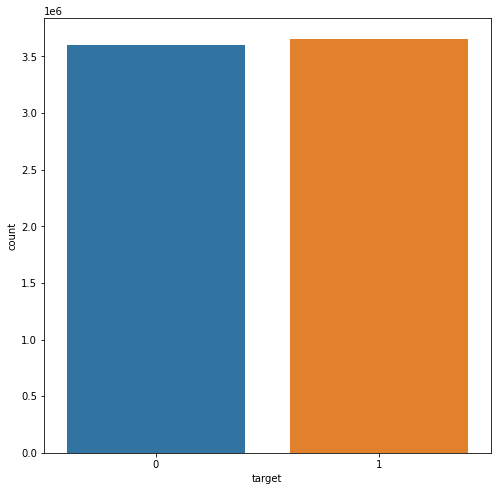

In [11]:
# Distribution of the ‘target’ variable
plt.figure(figsize = (8, 8)) 
sns.countplot(x='target', data=all_data)

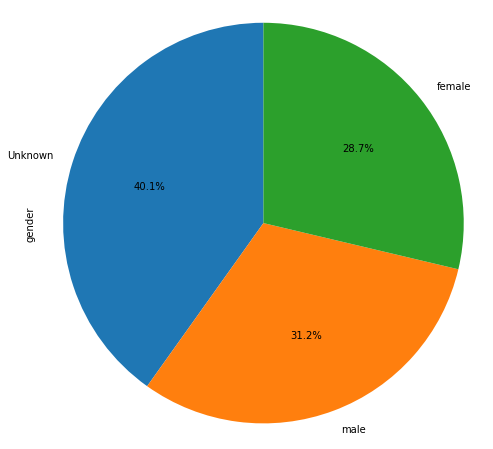

In [12]:
# gender plot
plt.figure(figsize = (8, 8)) 
pp = pd.value_counts(all_data.gender) 
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal') 
plt.show()

<AxesSubplot:xlabel='registration_init_time_year', ylabel='count'>

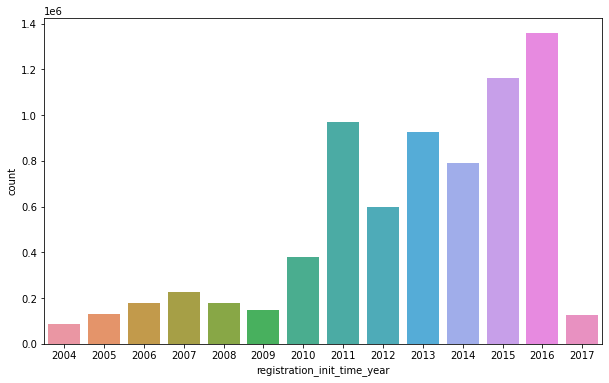

In [13]:
# registration Dates
plt.figure(figsize = (10, 6))
sns.countplot(x='registration_init_time_year', data=all_data)

/Users/ziky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bd', ylabel='count'>

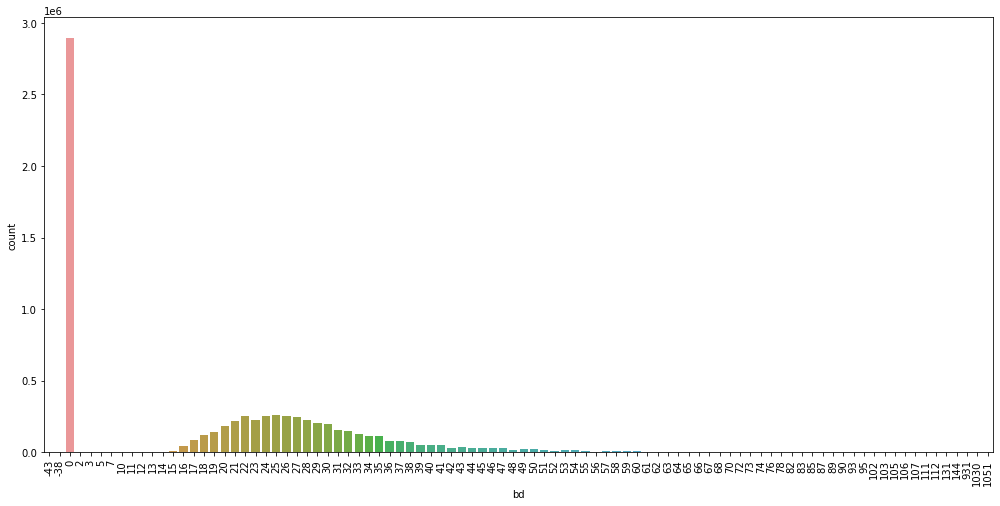

In [14]:
# bd plot
plt.figure(figsize = (17, 8))
plt.xticks(rotation=90)
sns.countplot(all_data.bd)

<AxesSubplot:xlabel='source_type', ylabel='count'>

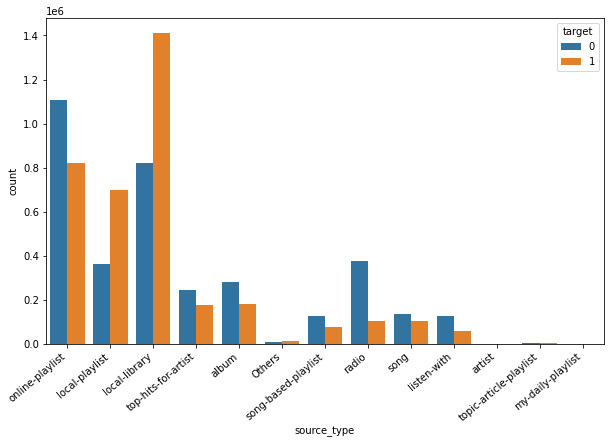

In [15]:
# source type vs target
plt.figure(figsize = (10, 6))
plt.xticks(rotation=40,ha='right')
sns.countplot(x='source_type', hue='target', data=all_data)

<AxesSubplot:xlabel='source_screen_name', ylabel='count'>

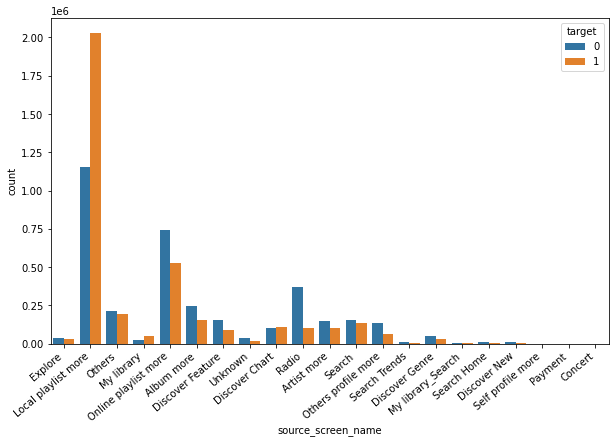

In [16]:
#source_screen_name vs target
plt.figure(figsize = (10, 6))
plt.xticks(rotation=40, ha='right')
sns.countplot(x=all_data['source_screen_name'], hue='target', data=all_data)

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

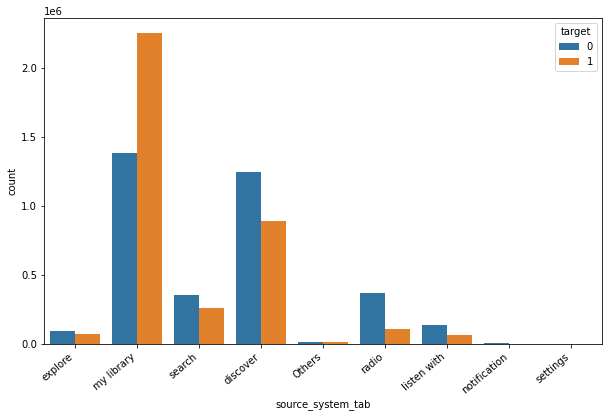

In [17]:
# source_system_tab vs target
plt.figure(figsize = (10, 6))
plt.xticks(rotation=40, ha='right')
sns.countplot(x='source_system_tab', hue='target', data=all_data)

<AxesSubplot:xlabel='genre_ids'>

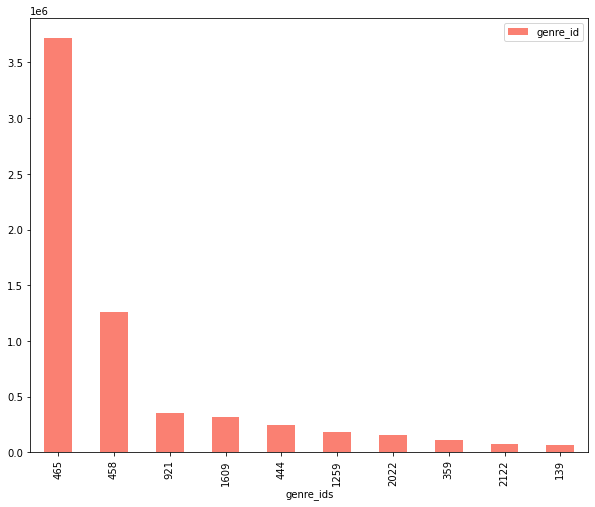

In [18]:
# song genre_ids plot
top10 = pd.DataFrame(all_data.groupby('genre_ids')['genre_ids'].count().nlargest(10))
top10.rename(columns={'genre_ids':'genre_id'},inplace=True)
top10.plot(kind='bar',figsize=(10,8),color='salmon')

# Models Methods and Results

In [19]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer

### Features obervation & handling

In [20]:
all_data.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'language', 'name', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date',
       'registration_init_time_year', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_year',
       'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [21]:
features = ['msno', 'song_id', 'source_system_tab', 'source_screen_name',
            'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
            'language', 'name', 'city', 'registered_via',
            'registration_init_time_year', 'expiration_date_year']
all_data[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257510 entries, 0 to 7377417
Data columns (total 15 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   msno                         object 
 1   song_id                      object 
 2   source_system_tab            object 
 3   source_screen_name           object 
 4   source_type                  object 
 5   target                       int64  
 6   song_length                  float64
 7   genre_ids                    object 
 8   artist_name                  object 
 9   language                     float64
 10  name                         object 
 11  city                         int64  
 12  registered_via               int64  
 13  registration_init_time_year  int64  
 14  expiration_date_year         int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 885.9+ MB


In [22]:
all_data[features].isna().sum().sum()

0

In [23]:
all_data[features].corr()

,target,song_length,language,city,registered_via,registration_init_time_year,expiration_date_year
target,1.000000,-0.002011,-0.027405,0.011948,0.009701,-0.001790,0.042308
song_length,-0.002011,1.000000,-0.212982,0.005186,0.002906,-0.007623,0.004539
language,-0.027405,-0.212982,1.000000,-0.022314,-0.000521,0.009426,-0.004152
city,0.011948,0.005186,-0.022314,1.000000,0.073648,-0.280145,0.149992
registered_via,0.009701,0.002906,-0.000521,0.073648,1.000000,-0.442610,0.083905
registration_init_time_year,-0.001790,-0.007623,0.009426,-0.280145,-0.442610,1.000000,-0.091728
expiration_date_year,0.042308,0.004539,-0.004152,0.149992,0.083905,-0.091728,1.000000


### Encoding & scale

In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

all_data['msno'] = enc.fit_transform(all_data['msno'])
all_data['song_id'] = enc.fit_transform(all_data['song_id'])
all_data['source_system_tab'] = enc.fit_transform(all_data['source_system_tab'])
all_data['source_screen_name'] = enc.fit_transform(all_data['source_screen_name'])
all_data['source_type'] = enc.fit_transform(all_data['source_type'])
all_data['genre_ids'] = enc.fit_transform(all_data['genre_ids'].astype('str'))
all_data['artist_name'] = enc.fit_transform(all_data['artist_name'].astype('str'))
all_data['name'] = enc.fit_transform(all_data['name'].astype('str'))

In [25]:
std_scaler = StandardScaler()
all_data['song_length'] = std_scaler.fit_transform(all_data[['song_length']])

In [26]:
all_data[features].head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,name,city,registered_via,registration_init_time_year,expiration_date_year
0,8153,73120,2,7,7,1,-0.575281,285,3193,52.0,50643,1,7,2012,2017
1,17249,218901,4,8,5,1,0.588899,90,31114,52.0,80084,13,9,2011,2017
2,17249,118276,4,8,5,1,-0.293227,90,20806,52.0,56424,13,9,2011,2017
3,17249,23205,4,8,5,1,0.155616,6,26712,-1.0,34190,13,9,2011,2017
4,8153,32627,2,7,7,1,-0.853519,2,4350,52.0,119944,1,7,2012,2017


### Random Sampling - 20%

In [27]:
train_data = all_data[features].sample(frac = 0.2)
train_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,name,city,registered_via,registration_init_time_year,expiration_date_year
5451202,23647,34426,1,11,7,0,-0.218141,101,29617,52.0,124274,4,4,2015,2017
2334595,24421,238020,4,9,5,1,-0.076943,344,34873,3.0,223682,5,9,2011,2017
7190052,1478,187558,1,11,7,0,-0.855934,185,22172,-1.0,62264,1,7,2016,2017
2350040,21086,275668,4,8,4,1,0.131382,561,24675,52.0,121609,15,9,2011,2017
5081754,4961,342842,1,11,7,0,0.122395,317,12400,17.0,159400,5,9,2007,2017


In [28]:
X = train_data.drop(columns='target')
y = train_data.target

from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify=y_trainval, random_state=0, test_size=0.2)

In [29]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(928960, 14) (928960,) (232241, 14) (232241,)


### KNN model

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = make_pipeline(KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors':  np.arange(1, 15, 2)}

knn_grid = GridSearchCV(knn, param_grid=param_grid, cv=2, return_train_score=True, n_jobs=-1)
knn_grid.fit(X_trainval, y_trainval)
print(f"best estimator and parameters: {knn_grid.best_estimator_}")

results = pd.DataFrame(knn_grid.cv_results_)
results

best estimator and parameters: Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier(n_neighbors=13))])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,4.134397,0.023874,28.120594,0.616004,1,{'kneighborsclassifier__n_neighbors': 1},0.522257,0.521567,0.521912,0.000345,7,1.000000,1.000000,1.000000,0.000000
1,4.218690,0.092310,33.798507,0.357908,3,{'kneighborsclassifier__n_neighbors': 3},0.529074,0.528868,0.528971,0.000103,6,0.760835,0.761223,0.761029,0.000194
2,4.189110,0.078813,36.648427,0.176515,5,{'kneighborsclassifier__n_neighbors': 5},0.533201,0.533686,0.533443,0.000242,5,0.702713,0.702265,0.702489,0.000224
3,4.191024,0.000001,39.040169,0.110269,7,{'kneighborsclassifier__n_neighbors': 7},0.536144,0.536614,0.536379,0.000235,4,0.673765,0.674100,0.673932,0.000167
4,2.486924,0.016165,37.106849,0.068671,9,{'kneighborsclassifier__n_neighbors': 9},0.537323,0.539006,0.538164,0.000842,3,0.656052,0.655736,0.655894,0.000158
5,2.698154,0.014243,38.085966,0.010811,11,{'kneighborsclassifier__n_neighbors': 11},0.540319,0.540717,0.540518,0.000199,2,0.643584,0.643506,0.643545,0.000039
6,2.663900,0.119892,39.551502,0.023903,13,{'kneighborsclassifier__n_neighbors': 13},0.541544,0.541645,0.541594,0.000050,1,0.635026,0.633950,0.634488,0.000538


In [31]:
print("accuracy on trainval set: %f" % knn_grid.score(X_trainval, y_trainval))
print("accuracy on test set: %f" % knn_grid.score(X_test, y_test))

accuracy on trainval set: 0.636537
accuracy on test set: 0.547284


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {'max_features': [6,10],
              'max_depth': [6,10],
              'n_estimators':[150,250]}

rf_grid = GridSearchCV(rf, param_grid=param_grid, cv=2, return_train_score=True, n_jobs=-1)
rf_grid.fit(X_trainval, y_trainval)

print(f"best estimator and parameters: {rf_grid.best_estimator_}")

rf_results = pd.DataFrame(rf_grid.cv_results_)
rf_results

best estimator and parameters: RandomForestClassifier(max_depth=10, max_features=10, n_estimators=150)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,224.608480,0.576659,10.989478,0.043107,6,6,150,"{'max_depth': 6, 'max_features': 6, 'n_estimat...",0.627446,0.626743,0.627095,3.516815e-04,8,0.627181,0.627796,0.627488,0.000308
1,383.551546,0.876818,18.169273,0.175481,6,6,250,"{'max_depth': 6, 'max_features': 6, 'n_estimat...",0.627279,0.627279,0.627279,3.209789e-07,7,0.627112,0.628442,0.627777,0.000665
2,360.590924,0.254685,11.932371,0.069445,6,10,150,"{'max_depth': 6, 'max_features': 10, 'n_estima...",0.627644,0.627360,0.627502,1.424150e-04,6,0.627468,0.628414,0.627941,0.000473
3,588.985505,0.279799,17.994905,0.027225,6,10,250,"{'max_depth': 6, 'max_features': 10, 'n_estima...",0.627753,0.627718,0.627735,1.754413e-05,5,0.627663,0.628797,0.628230,0.000567
4,363.865292,0.261319,15.646440,0.065320,10,6,150,"{'max_depth': 10, 'max_features': 6, 'n_estima...",0.635536,0.634848,0.635192,3.439239e-04,3,0.639619,0.639157,0.639388,0.000231
5,542.185695,0.828546,22.155498,0.015425,10,6,250,"{'max_depth': 10, 'max_features': 6, 'n_estima...",0.635442,0.634766,0.635104,3.378958e-04,4,0.639239,0.639114,0.639176,0.000063
6,513.189767,1.030070,13.914130,0.155516,10,10,150,"{'max_depth': 10, 'max_features': 10, 'n_estim...",0.636714,0.636125,0.636420,2.948358e-04,1,0.641449,0.641043,0.641246,0.000203
7,589.943464,0.603131,12.578074,0.026347,10,10,250,"{'max_depth': 10, 'max_features': 10, 'n_estim...",0.636416,0.635866,0.636141,2.750289e-04,2,0.641013,0.640721,0.640867,0.000146


In [33]:
print("accuracy on trainval set: %f" % rf_grid.score(X_trainval, y_trainval))
print("accuracy on test set: %f" % rf_grid.score(X_test, y_test))

accuracy on trainval set: 0.639239
accuracy on test set: 0.636364


<AxesSubplot:xlabel='param_n_estimators'>

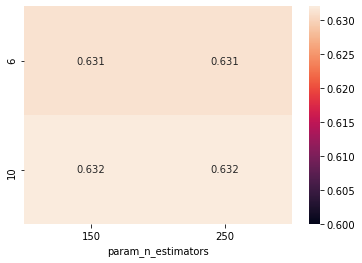

In [34]:
res = pd.pivot_table(pd.DataFrame(rf_grid.cv_results_), values='mean_test_score', index='param_max_features', columns='param_n_estimators')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))
res

sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

### XGBoost

In [35]:
import xgboost 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [36]:
xgb = XGBClassifier(use_label_encoder=False)

param_grid = {'max_depth':[6,7],'learning_rate':[0.03, 0.3], 'n_estimators':[250,500]}
xgb_grid = GridSearchCV(xgb,param_grid=param_grid, cv=2, return_train_score=True, n_jobs=-1)
xgb_grid.fit(X_trainval, y_trainval)

print(f"best estimator and parameters: {xgb_grid.best_estimator_}")

[19:02:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best estimator and parameters: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1,

In [37]:
print("accuracy on trainval set: %f" % xgb_grid.score(X_trainval, y_trainval))
print("accuracy on test set: %f" % xgb_grid.score(X_test, y_test))

accuracy on trainval set: 0.713743
accuracy on test set: 0.670421


### LightGBM

In [38]:
lgbm = LGBMClassifier()
lgbm.fit(X_trainval, y_trainval)
print("accuracy on trainval set: %f" % lgbm.score(X_trainval, y_trainval))
print("accuracy on test set: %f" % lgbm.score(X_test, y_test))

accuracy on trainval set: 0.642922
accuracy on test set: 0.642247


### CatBoost

In [39]:
catb = CatBoostClassifier(verbose=False)
catb.fit(X_trainval, y_trainval)
print("accuracy on trainval set: %f" % catb.score(X_trainval, y_trainval))
print("accuracy on test set: %f" % catb.score(X_test, y_test))

accuracy on trainval set: 0.663001
accuracy on test set: 0.654435


## Best Performance Metrics and Important features plot

XGBoost Classification
 [[ 91838  52237]
 [ 43440 102786]]
0.670421390212228


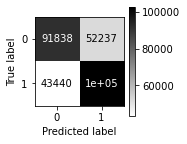

In [40]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

xgb_predicted = xgb_grid.predict(X_test)
confusion = confusion_matrix(y_test, xgb_predicted)

print('XGBoost Classification\n', confusion)

print(xgb_grid.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(xgb_grid, X_test, y_test, cmap='gray_r', ax=ax)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy score of the XGB1 is {:.3f}'.format(accuracy_score(y_test, xgb_predicted)))
print('Precision score of the XGB1 is {:.3f}'.format(precision_score(y_test, xgb_predicted)))
print('Recall score of the XGB1 is {:.3f}'.format(recall_score(y_test, xgb_predicted)))

Accuracy score of the XGB1 is 0.670
Precision score of the XGB1 is 0.663
Recall score of the XGB1 is 0.703


                    cols    imp
4            source_type  0.357
13  expiration_date_year  0.088
3     source_screen_name  0.081
8               language  0.060
2      source_system_tab  0.053
6              genre_ids  0.053
0                   msno  0.050
11        registered_via  0.043
7            artist_name  0.040
10                  city  0.038


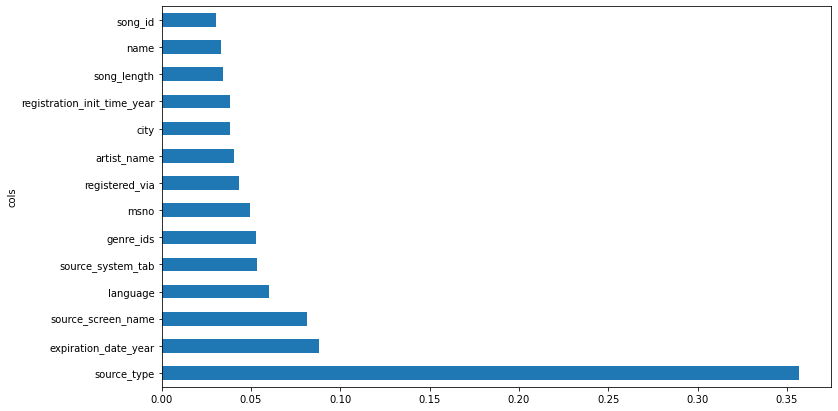

In [42]:
### Feature selection
def xgb_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

xgb_best = xgb_grid.best_estimator_
fi = xgb_feat_importance(xgb_best, X_trainval); 
print(fi[:10])

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:30])
plt.show()

# Future Improvemt

In [43]:
all_data2 = all_data.copy()
all_data2.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'language', 'name', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date',
       'registration_init_time_year', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_year',
       'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [44]:
# registration_init_time
all_data2['registration_init_time'] = pd.to_datetime(all_data2['registration_init_time'], format='%Y%m%d', errors='ignore').astype('datetime64[ns]')

# expiration_date
all_data2['expiration_date'] = pd.to_datetime(all_data2['expiration_date'], format='%Y%m%d', errors='ignore').astype('datetime64[ns]')

all_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257510 entries, 0 to 7377417
Data columns (total 23 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   msno                          int64         
 1   song_id                       int64         
 2   source_system_tab             int64         
 3   source_screen_name            int64         
 4   source_type                   int64         
 5   target                        int64         
 6   song_length                   float64       
 7   genre_ids                     int64         
 8   artist_name                   int64         
 9   language                      float64       
 10  name                          int64         
 11  city                          int64         
 12  bd                            int64         
 13  gender                        object        
 14  registered_via                int64         
 15  registration_init_time        da

In [45]:
all_data2['membership_duration'] = all_data2['expiration_date']-all_data2['registration_init_time']

In [46]:
msno_count = all_data2.groupby('msno',as_index=False)['msno'].count().rename(columns={'msno':'msno_count'})
msno_count

,msno_count
0,587
1,217
2,107
3,15
4,219
...,...
30730,16
30731,276
30732,451
30733,259


In [47]:
all_data2.sort_values(by='msno').head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,...,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day,membership_duration
5174108,0,167510,4,8,5,1,-0.567,344,2668,52.0,...,9,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days
803834,0,142263,4,8,4,0,-0.613,90,25479,-1.0,...,9,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days
643160,0,225151,1,12,11,0,0.281,120,1156,-1.0,...,9,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days
803833,0,344148,4,8,4,0,-0.336,344,25479,52.0,...,9,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days
3737965,0,284292,4,8,4,1,0.734,337,36226,3.0,...,9,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days
643159,0,323354,1,12,11,0,-0.442,150,1156,52.0,...,9,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days
643158,0,96882,1,12,11,0,-0.575,150,1156,52.0,...,9,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days
583431,0,154079,1,0,1,0,0.819,149,31114,52.0,...,9,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days
2813903,0,42228,4,8,4,0,1.077,344,34458,3.0,...,9,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days
2813906,0,100956,4,8,4,0,-0.592,344,38580,3.0,...,9,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days


In [48]:
pd.merge(all_data2, msno_count, left_on='msno',right_on=msno_count.index).sort_values(by='msno').head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,...,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day,membership_duration,msno_count
5596999,0,36700,4,8,5,1,-0.258,344,25487,52.0,...,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days,587
5596856,0,300020,1,11,4,0,0.462,344,34142,3.0,...,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days,587
5596855,0,232842,1,11,4,0,0.259,344,37761,3.0,...,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days,587
5596854,0,331848,1,11,4,0,0.305,344,37020,3.0,...,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days,587
5596853,0,212660,1,11,4,0,-0.156,334,34077,3.0,...,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days,587
5596852,0,166692,1,11,4,0,0.154,334,36956,3.0,...,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days,587
5596851,0,288306,1,11,4,0,0.258,344,35267,3.0,...,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days,587
5596857,0,164372,1,11,4,0,0.051,344,2702,17.0,...,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days,587
5596850,0,337006,1,11,4,0,0.633,344,31114,3.0,...,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days,587
5596848,0,78769,1,11,4,1,-0.275,344,35440,3.0,...,2006-02-18,2017-10-21,2006,2,18,2017,10,21,4263 days,587


In [49]:
all_data2 = pd.merge(all_data2, msno_count, left_on='msno',right_on=msno_count.index)

### Adjusting different features

In [50]:
features2 = ['msno_count','source_system_tab', 'source_screen_name', 'source_type',
            'target', 'song_length', 'genre_ids', 'artist_name',
            'language', 'city', 'registered_via','membership_duration']
train2 = all_data2[features2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257510 entries, 0 to 7257509
Data columns (total 12 columns):
 #   Column               Dtype          
---  ------               -----          
 0   msno_count           int64          
 1   source_system_tab    int64          
 2   source_screen_name   int64          
 3   source_type          int64          
 4   target               int64          
 5   song_length          float64        
 6   genre_ids            int64          
 7   artist_name          int64          
 8   language             float64        
 9   city                 int64          
 10  registered_via       int64          
 11  membership_duration  timedelta64[ns]
dtypes: float64(2), int64(9), timedelta64[ns](1)
memory usage: 719.8 MB


In [51]:
all_data2['membership_duration'] = all_data2['membership_duration'].dt.days

### Using 30% sample

In [52]:
train_data2 = all_data2[features2].sample(frac = 0.3)
train_data2.head()

,msno_count,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,city,registered_via,membership_duration
5440946,1032,1,8,4,0,-1.067,337,32771,3.0,12,9,2935
366657,985,4,8,4,1,-0.768,344,35808,3.0,1,7,1676
2319125,743,4,8,4,1,-0.144,344,18903,52.0,1,9,448
6357136,128,4,8,4,0,-0.232,344,38938,3.0,22,3,836
5817699,156,1,8,4,0,-0.087,337,37799,3.0,1,7,608


In [53]:
X2 = train_data2.drop(columns='target')
y2 = train_data2.target

from sklearn.model_selection import train_test_split
X_trainval2, X_test2, y_trainval2, y_test2 = train_test_split(X2, y2, stratify=y2, random_state=0, test_size=0.2)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_trainval2, y_trainval2, stratify=y_trainval2, random_state=0, test_size=0.2)

In [54]:
print(X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape)

(1393441, 11) (1393441,) (348361, 11) (348361,)


In [55]:
## random forest 2
param_grid = {'max_features': [6,7,8],
              'max_depth': [11]}

rf = RandomForestClassifier()

rf_grid2 = GridSearchCV(rf, param_grid=param_grid, cv=2, return_train_score=True,n_jobs=-1)
rf_grid2.fit(X_trainval2, y_trainval2)

print(rf_grid2.best_params_)
print("accuracy on trainval set: %f" % rf_grid2.score(X_trainval2, y_trainval2))
print("accuracy on test set: %f" % rf_grid2.score(X_test2, y_test2))

{'max_depth': 11, 'max_features': 8}
accuracy on trainval set: 0.646204
accuracy on test set: 0.643317


In [56]:
## XGBoost 2
xgb = XGBClassifier(use_label_encoder=False)

param_grid = {'max_depth':[9,10]}
xgb_grid2 = GridSearchCV(xgb,param_grid=param_grid, cv=2, return_train_score=True, n_jobs=-1)
xgb_grid2.fit(X_trainval2, y_trainval2)

print(xgb_grid2.best_params_)
print("accuracy on trainval set: %f" % xgb_grid2.score(X_trainval2, y_trainval2))
print("accuracy on test set: %f" % xgb_grid2.score(X_test2, y_test2))

[19:27:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 10}
accuracy on trainval set: 0.714016
accuracy on test set: 0.684311


In [57]:
## LGBM 2
lgbm2 = LGBMClassifier()

lgbm2.fit(X_trainval2, y_trainval2)
print("accuracy on trainval set: %f" % lgbm2.score(X_trainval2, y_trainval2))
print("accuracy on test set: %f" % lgbm2.score(X_test2, y_test2))

accuracy on trainval set: 0.646990
accuracy on test set: 0.646622


In [58]:
## CatBoost 2
catb2 = CatBoostClassifier(verbose=False)
catb2.fit(X_trainval2, y_trainval2)
print("accuracy on trainval set: %f" % catb2.score(X_trainval2, y_trainval2))
print("accuracy on test set: %f" % catb2.score(X_test2, y_test2))

accuracy on trainval set: 0.669446
accuracy on test set: 0.664550


## Best Performance Metrics and Important features plot

XGBoost Classification
 [[140344  75638]
 [ 61829 157640]]
0.6843112083793584


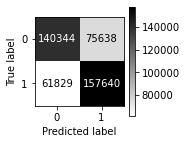

In [59]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
xgb_predicted2 = xgb_grid2.predict(X_test2)
confusion2 = confusion_matrix(y_test2, xgb_predicted2)

print('XGBoost Classification\n', confusion2)

print(xgb_grid2.score(X_test2, y_test2))

fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(xgb_grid2, X_test2, y_test2, cmap='gray_r', ax=ax)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy score of the XGB2 is {:.3f}'.format(accuracy_score(y_test2, xgb_predicted2)))
print('Precision score of the XGB2 is {:.3f}'.format(precision_score(y_test2, xgb_predicted2)))
print('Recall score of the XGB2 is {:.3f}'.format(recall_score(y_test2, xgb_predicted2)))

Accuracy score of the XGB2 is 0.684
Precision score of the XGB2 is 0.676
Recall score of the XGB2 is 0.718


                   cols    imp
3           source_type  0.444
2    source_screen_name  0.100
0            msno_count  0.065
10  membership_duration  0.059
7              language  0.057
5             genre_ids  0.052
9        registered_via  0.049
1     source_system_tab  0.047
8                  city  0.046
6           artist_name  0.043


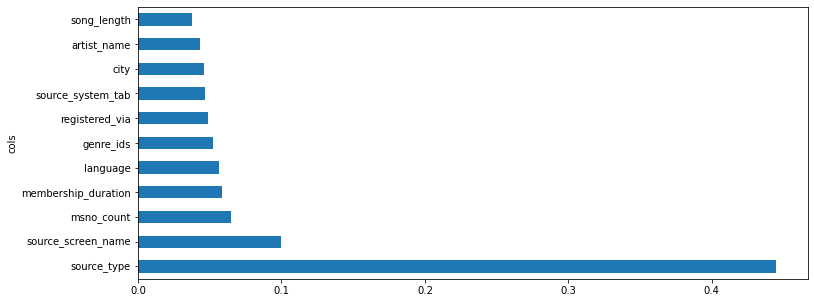

In [62]:
### Features importance
def xgb_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

xgb_best2 = xgb_grid2.best_estimator_
fi = xgb_feat_importance(xgb_best2, X_trainval2); 
print(fi[:10])

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,5), legend=False)
plot_fi(fi[:30])
plt.show()